<h1><font color ='red'>Petit projet sur la Pénisule du Kamchatka dans le pays Russie</font></h1>

# INTRODUCTION

Située à l'extrême orient de la Russie, la péninsule du Kamtchatka occupe une position géographique exceptionnelle dans ce vaste pays qui s'étend sur une grande partie de l'Asie. En effet, elle se trouve au cœur de l'Extrême-Orient russe, ce qui en fait une composante essentielle de la Fédération de Russie. La particularité géologique de la péninsule réside dans son emplacement sur la plaque tectonique nord-américaine, à proximité de la plaque pacifique.

Plus précisément, la partie méridionale de la péninsule de Kamtchatka repose au-dessus de la marge convergente des plaques, où la plaque du Pacifique plonge sous la plaque d'Okhotsk le long de la ligne de la fosse de Kuril-Kamtchatka. La vitesse de convergence entre ces deux plaques atteint environ 86 mm par an. Cette convergence provoque des séismes dus aux ruptures le long de la limite de subduction majeure entre les deux plaques, à la fois à l'intérieur de la plaque du Pacifique en plongée et à l'intérieur de la plaque d'Okhotsk en surplomb.[1]

En revanche, la partie septentrionale de la péninsule est éloignée des limites convergentes de la fosse de Kuril-Kamtchatka et de la fosse des Aléoutiennes. Elle se trouve cependant à la frontière de deux blocs au sein de la plaque nord-américaine, les microplaques de Kolyma-Chukotka et de la mer de Béring. Cette frontière est caractérisée par un raccourcissement actif et des mouvements latéraux droits le long d'une série de grandes failles qui s'étendent du sud-ouest au nord-est.

Le choix d'étudier la péninsule du Kamtchatka est motivé par son intensité d'activité géologique, en particulier dans sa partie méridionale. Cette région est célèbre pour ses volcans actifs, ses séismes fréquents et son paysage exceptionnel façonné par ces forces géologiques. En envisageant l'avenir, la recherche dans cette région pourrait ouvrir de nouvelles perspectives en matière de surveillance sismique et volcanique. L'objectif serait d'améliorer la prévision des événements sismiques et volcaniques, permettant ainsi des réponses plus efficaces face aux menaces qui pèsent sur les communautés locales.

In [1]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from obspy.imaging.beachball import beach

import shapefile
import geopandas as gpd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.colors as mcolors
import matplotlib.image as mpimag
import matplotlib.patches as mpatches
import matplotlib.cm as cm

C:\Users\TOKY\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


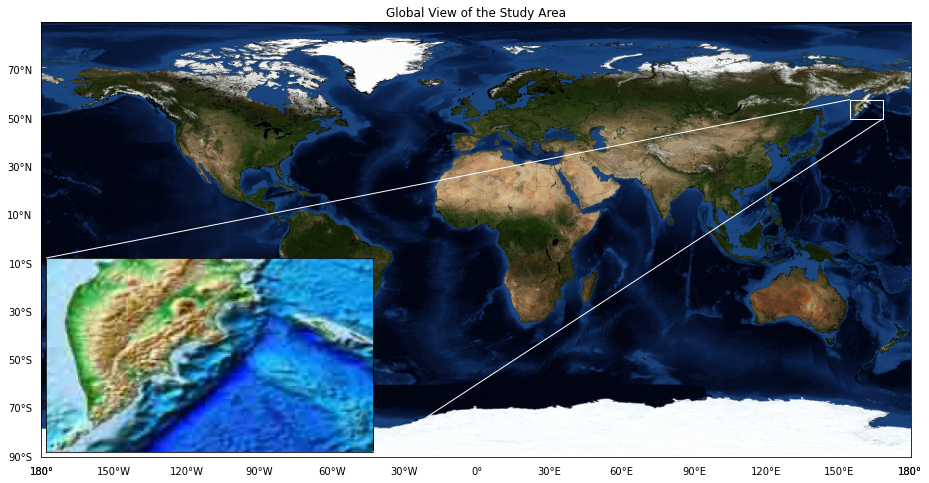

In [2]:
## Script to display the location of the study area
# Create a figure with a specified size and Add a subplot to the figure
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)

# Create a Basemap with cylindrical projection centered at (0, 0) and Add 
#the Blue Marble background image, Draw country boundaries,Draw coastlines with a thin line.
map1 = Basemap(projection='cyl', lat_0=0, lon_0=0, resolution='h')
map1.bluemarble()
map1.drawcountries(linewidth=0.1)
map1.drawcoastlines(linewidth=0.1)

# Draw latitude grid lines with labels on the left side of the map
map1.drawparallels(range(-90, 90, 20), labels=[1, 0, 0, 0], linewidth=0.01)

# Draw longitude grid lines with labels at the bottom of the map
map1.drawmeridians(range(-180, 180, 30), labels=[0, 0, 0, 1], linewidth=0.01)

# Set the title of the plot
plt.title("Global View of the Study Area")

# Create an inset axis to zoom in on a specific area
axins = zoomed_inset_axes(ax, 10, loc=3)

# Create another Basemap for the zoomed-in area with specified coordinates
map2 = Basemap(llcrnrlon=154.775, llcrnrlat=49.951, urcrnrlon=168.311, urcrnrlat=57.985, resolution='h')
# Add an ArcGIS image of the world physical map to the zoomed-in area, Draw coastlines,Draw country boundaries
#in the zoomed-in area with a thicker line 
map2.etopo()
map2.drawcoastlines(linewidth=0.1)
map2.drawcountries(linewidth=0.3)

# Mark the inset on the main map
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="1", zorder=5)
# Display the plot
plt.show()

(-0.5, 624.5, 871.5, -0.5)

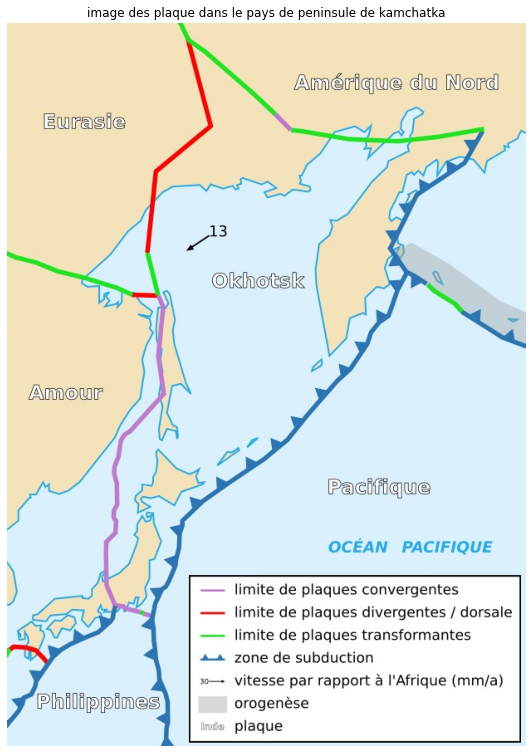

In [11]:
fig = plt.figure(figsize=(8,12))
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.05)
plaque2 = mpimag.imread("Okhotsk_Plate_map-fr.png")
plt.imshow(plaque2)
plt.title("image des plaque dans le pays de peninsule de kamchatka")
plt.axis('off')

Ce projet combine des données fournies par l'USGS[2] sur une période allant de 1950 à 2023, ainsi que des mécanismes focaux du CMT global pour les années 1976 à 2023.

J'ai utilisé les données sismiques de l'USGS, qui comprennent des enregistrements de tremblements de terre enregistrés dans la péninsule de Kamchatka entre 1950 et 2023. Ces données comprennent des informations sur la localisation, la magnitude et la profondeur des tremblements de terre.

Pour comprendre les mécanismes focaux des tremblements de terre dans la région, utilisons les données du Catalogue de Mécanismes Focaux de Centroid-Moment Tensor (CMT)[3] pour la période de 1976 à 2023. Les mécanismes focaux CMT fournissent des informations sur la direction et l'intensité des déplacements le long des failles lors des tremblements de terre.

La realisation d'une analyse des failles et  les caractéristiques sismotectoniques dans  la péninsule de Kamchatka.

Pour visualiser nos résultats, il y  des cartes montrant la distribution spatiale des tremblements de terre en Kamchatka, des mécanismes focaux et des failles dans cette partie kamchatka . Nous avons également inclus des informations sur la magnitude des tremblements de terre pour mieux comprendre la sévérité des événements.

In [12]:
data = pd.read_csv('RussUSGS.csv')

lons = data['longitude'].values
lats = data['latitude'].values
mag = data['mag'].values
alt = data['depth'].values
date = pd.to_datetime(data['time'].values)

min_lat= 49.951
max_lat= 57.985
min_lon= 154.775
max_lon= 168.311

In [15]:
# Define a function named Show_map
def Show_map():
    # Load a topographic image
    Topo_Pict = plt.imread("reliefKP.jpeg")
    
    # Create a new figure with specified dimensions and adjust subplot spacing
    fig = plt.figure(figsize=(10, 15))
    plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.05)

    # Create a Basemap object for the map with specified boundaries and projection
    map = Basemap(llcrnrlon=min_lon, llcrnrlat=min_lat, urcrnrlon=max_lon, urcrnrlat=max_lat, resolution='l',
                  projection='merc', lat_0=35, lon_0=26)
    # Define the extent of the picture to be displayed on the map
    Pict_extent = (0, 0, 1928, 3249)  # Make sure these values match the size of your image

    # Add the image as a background with the specified extent
    map.imshow(np.flipud(Topo_Pict), extent=Pict_extent)

    # Draw lines of latitude (parallels)
    parallels = np.arange(50, 70, 1)  # You can adjust these values as needed
    map.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10, linewidth=0.5, color='gray')

    # Draw lines of longitude (meridians)
    meridians = np.arange(156, 180, 1)  # You can adjust these values as needed
    map.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10, linewidth=0.5, color='gray')
    return map

C:\Users\TOKY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


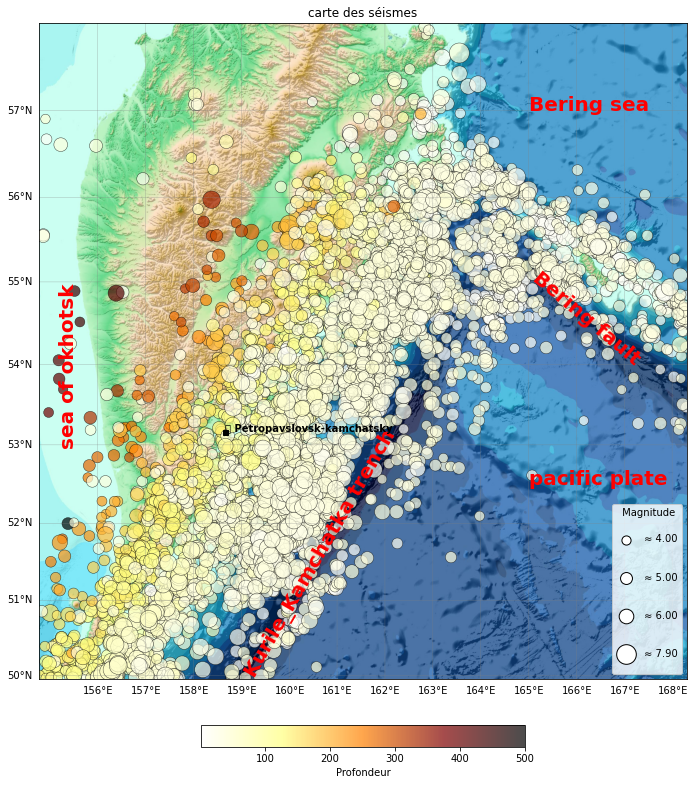

In [16]:
map = Show_map()
#grandeur des point en fonction du magnitude
sizes = [(mg * 90)-270 for mg in mag]
x,y = map(lons,lats)

#########################################-----x------####################################################
#séisme de magnitude 4 à 8
scatter = map.scatter(x, y, c=alt, s=sizes, cmap='afmhot_r', alpha=0.7,edgecolor = 'k', linewidths=0.5)

cbar = plt.colorbar(scatter, label='Profondeur', location='bottom',shrink=0.5, aspect=15, pad=0.05)
#legende de magnitude
legend_handles = [ ]
for magV in [4 , 5, 6, 7.9]:
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='none', markerfacecolor='w', markeredgecolor='k',
                                          markersize=np.sqrt((magV *6.5*magV - 20)), label=f' \n≈ {magV :.2f}\n'))
        
plt.legend(handles=legend_handles, title=' Magnitude', loc='lower right')

#########################################-----x------####################################################
# Coordinates for labels and arrows
label_coords = {
    "Bering sea": [57, 165], 
    "Bering fault": [54, 165],"Kurile_Kamchatka trench": [50, 159],
    "pacific plate": [52.5, 165],"sea of okhotsk": [53, 155.2]
}

# Add labels to the map with specified rotations
for label, coords in label_coords.items():
    x, y = map(coords[1], coords[0])
    rotation_angle = 0  # Default rotation angle
    if label == "Bering fault":
        rotation_angle = -40  # Rotate Bering Fault label by 40 degrees
    elif label == "Bering sea":
        rotation_angle = 0  # Rotate Bering sea 0 degrees
    elif label == "Kurile_Kamchatka trench":
        rotation_angle = 60  # Rotate Kurile_Kamtchayka trench label by 190 degrees
    elif label == "sea of okhotsk":
        rotation_angle = 90  # Rotate sea of okhotsk label by 90 degrees
    plt.annotate(label, xy=(x, y), xytext=(x, y), color='r', fontsize=20, weight='bold', rotation=rotation_angle)

# Coordonnées de Istanbul, Ankara 
Petr_coords = [53.167,158.65]
x_petr, y_petr = map(Petr_coords[1], Petr_coords[0])
map.plot(x_petr, y_petr, marker='s', markersize=5, color='black')
plt.annotate('\t Petropavslovsk-kamchatsky', xy=(x_petr, y_petr),
             xytext=(x_petr, y_petr),color='k', fontsize=10,weight='bold')

plt.title("carte des séismes")
plt.show()

La péninsule de Kamchatka est sujette à une activité sismique accrue en raison de plusieurs facteurs liés aux caractéristiques des sources sismiques et des failles actives.

<p> Convergence des plaques tectoniques : L'une des raisons principales de l'augmentation de l'activité sismique dans la partie sud de la péninsule de Kamchatka est la convergence des plaques tectoniques. La plaque du Pacifique se déplace sous la plaque nord-américaine, créant ainsi une zone de subduction. Cette interaction de plaques génère d'énormes forces de compression, ce qui rend la croûte terrestre instable et susceptible de provoquer des séismes le long de la zone de subduction.

 <p> La Variabilité de la Plaque:  la plaque du Pacifique qui plonge sous l'arc a une épaisseur variable. Lorsque la plaque est plus épaisse, elle peut générer plus de contraintes et de pressions, ce qui augmente la probabilité de tremblements de terre. Cela se produit plus fréquemment sous les Kouriles du Sud et le Japon, où la plaque est plus épaisse <font color ='red'>[2]</font >.</p>
    
<p> Présence de failles et de zones de relâchement de contraintes : La région de Kamchatka est traversée par diverses failles géologiques <font color ='red'>[4]</font >et zones de relâchement de contraintes. Ces structures géologiques résultent de la complexité de la tectonique locale. Les interactions entre ces failles peuvent déclencher différents types de séismes, notamment des séismes de subduction, des séismes intraplaques et des séismes associés à des failles locales<font color ='red'>[3]</font >.

</p> La Profondeur de la Subduction: Les variations dans la profondeur à laquelle la plaque est subduite le long de l'arc des Kouriles-Kamtchatka ont également un impact. Lorsque la subduction est plus profonde, elle peut générer des tremblements de terre plus puissants<font color ='red'>[3]</font >.</p>
    
<p> Activité volcanique : Kamchatka est une région volcanique active, abritant de nombreux volcans en éruption ou potentiellement actifs. Les mouvements magmatiques et les éruptions volcaniques peuvent également induire des séismes. L'activité volcanique contribue ainsi à l'augmentation de l'activité sismique dans la région<font color ='red'>[3],[4]</font >. 

<p> Structure géologique complexe : La péninsule de Kamchatka présente une structure géologique complexe avec des variations de densité, de composition et d'âge de la croûte terrestre. Ces variations créent des zones de faiblesse et de contraintes, favorisant ainsi la génération de séismes<font color ='red'>[3]</font >.
    
 Activité géologique intense : La région sud de Kamchatka est caractérisée par une activité géologique intense.Les mouvements significatifs du sol se produisent, notamment des mouvements verticaux importants. Cette activité géologique est un facteur majeur qui contribue à la fréquence des séismes<font color ='red'>[5] </font >.
   

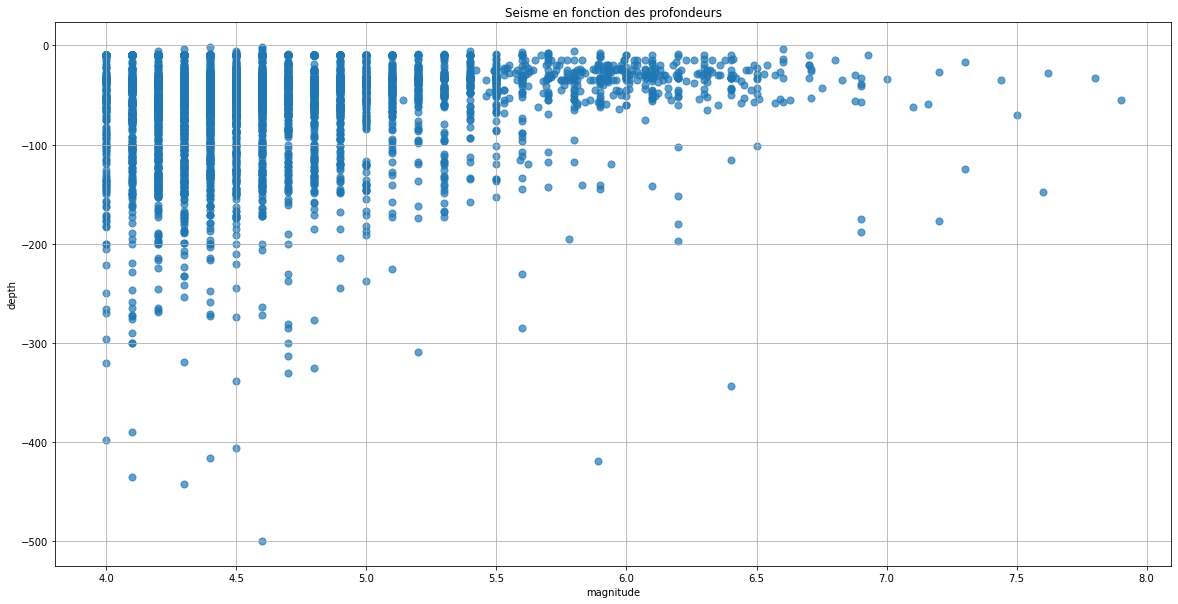

In [26]:
plt.figure(figsize = (20,10))
plt.scatter(mag, -alt, s = 50, alpha = 0.7)
plt.xlabel('magnitude')
plt.ylabel('depth')
plt.title('Seisme en fonction des profondeurs')
plt.grid()

La détection des séismes dans l'arc de Kuril-Kamtchatka présente une particularité intéressante : les séismes situés à une profondeur inférieure à 40 km sont fréquemment détectés, tandis que ceux situés à une profondeur supérieure à 100 km sont beaucoup moins fréquents et moins détectés. Cette observation provient d'une analyse des événements sismiques de magnitude moment supérieure à 6,0 enregistrés entre 1973 et 1993 près de la péninsule de Kamtchatka. Cette analyse a mis en évidence certaines régularités dans la répartition spatiale et temporelle de ces événements<font color ='red'>[6] </font >. 

Premièrement, les trois événements sismiques de grande envergure ont été caractérisés par une activité intense de répliques sismiques, ce que l'on appelle une séquence de répliques. Une séquence de répliques est définie comme une série de séismes de magnitude supérieure à 1,0 survenant dans les trois premiers jours suivant le séisme principal et situés à moins de 50 km de l'épicentre du séisme principal. Toutes les répliques sismiques de ces trois grands événements sont survenues dans les zones de répliques sismiques de ces séismes principaux.

Deuxièmement, en examinant la répartition temporelle de l'activité sismique dans ces zones de répliques sismiques pour chacun des trois grands événements, on constate que chacune de ces zones était caractérisée par un faible niveau d'activité sismique jusqu'à l'apparition d'un événement de magnitude moment supérieure à 6,0. Ensuite, dans un délai d'un à quatre ans, l'événement de grande envergure a eu lieu. Chaque occurrence de ces événements majeurs était précédée d'un événement de magnitude modérée similaire. Ces paires d'événements modérés et majeurs partageaient des caractéristiques similaires en termes de localisation, de profondeur et de séquence temporelle.

Troisièmement, ces observations se vérifient également pour d'autres paires d'événements sismiques. Par exemple, une paire d'événements a eu lieu dans le golfe de Kamtchatka, une autre près du cap Shipunsky, et une troisième au sud de la péninsule. Dans chaque cas, les événements modérés ont précédé les événements majeurs dans des zones de répliques sismiques similaires.

En conclusion, cette étude montre que les séismes de grande envergure dans la région de l'arc de Kuril-Kamtchatka sont souvent précédés par des événements sismiques modérés dans des zones de répliques sismiques. Cependant, cette relation spatiale et temporelle semble être plus marquée pour les séismes situés à des profondeurs inférieures à 40 km, tandis que les séismes situés à des profondeurs supérieures à 100 km sont moins fréquents et moins détectés, ce qui peut être dû à des différences dans la manière dont ces séismes se propagent et sont enregistrés.

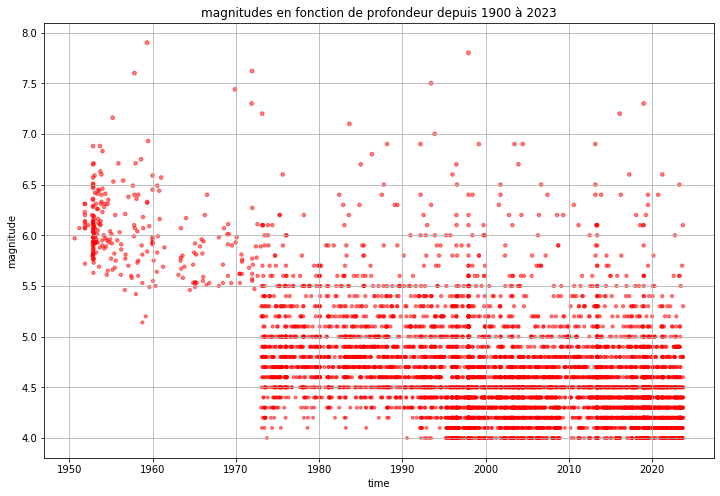

In [18]:
plt.figure(figsize = (12,8))
plt.scatter(date, mag,c ='r', s = mag*2, alpha = 0.5)
plt.xlabel('time')
plt.ylabel('magnitude')
plt.title('magnitudes en fonction de profondeur depuis 1900 à 2023')
plt.grid()

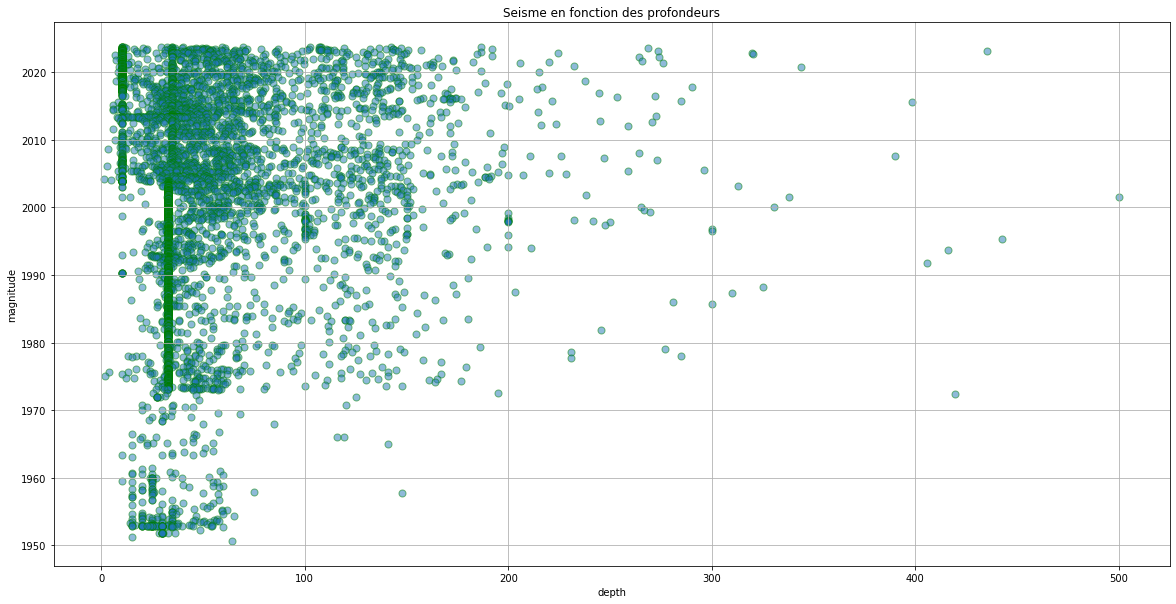

In [19]:
plt.figure(figsize = (20,10))
plt.scatter(alt, date, s = 50, alpha = 0.5, edgecolors = 'g')
plt.xlabel('depth')
plt.ylabel('magnitude')
plt.title('Seisme en fonction des profondeurs')
plt.grid()

Le texte indique que les principales causes des séismes dans la zone de subduction de Kamtchatka sont liées à la dynamique de la subduction de la plaque pacifique sous la plaque eurasiatique. Voici un résumé des principales causes mentionnées dans le texte :

1. Convergence des plaques : La convergence entre la plaque pacifique et la plaque eurasiatique est une force géodynamique majeure qui entraîne des contraintes et des déformations dans la zone de subduction de Kamtchatka. Cette convergence, également appelée "poussée de dorsale", provoque une compression horizontale presque horizontale avec une tendance SE (sud-est) à des profondeurs allant de 0 à 60 km.

2. Traction de la plaque : Une autre force importante est la traction exercée par la plaque subduite, qui tire la plaque pacifique dans la zone de subduction. Cela crée une contrainte minimale orientée vers le bas (σ₃) dans les couches de profondeur de 0 à 40 km et de 41 à 60 km.

3. Déformation de la plaque subduite : Le texte indique que la plaque subduite subit une déformation à des profondeurs supérieures à 61 km. Cette déformation est associée à une compression parallèle à la plaque, inclinée vers le bas, dans la partie frontale de la zone de subduction (Wadati-Benioff), ainsi qu'à une extension parallèle à la plaque inclinée vers le bas et une compression peu profonde orientée vers le SE dans la partie interne de la zone.

4. Modification du régime de subduction : Le texte mentionne également que la subduction des monts Meiji dans la fosse océanique modifie le régime de subduction dans la zone de Kamtchatka. Cela se traduit par un changement de l'angle de plongée, une sismicité moins profonde et un déplacement du front volcanique dans la partie nord de la zone de subduction.

En résumé, les principales causes des séismes dans la zone de subduction de Kamtchatka sont liées à la convergence entre les plaques tectoniques, la traction exercée par la plaque subduite, la déformation de la plaque subduite et les modifications du régime de subduction dues à des facteurs géodynamiques. Ces forces génèrent des contraintes et des déformations dans la région, ce qui conduit à des séismes.

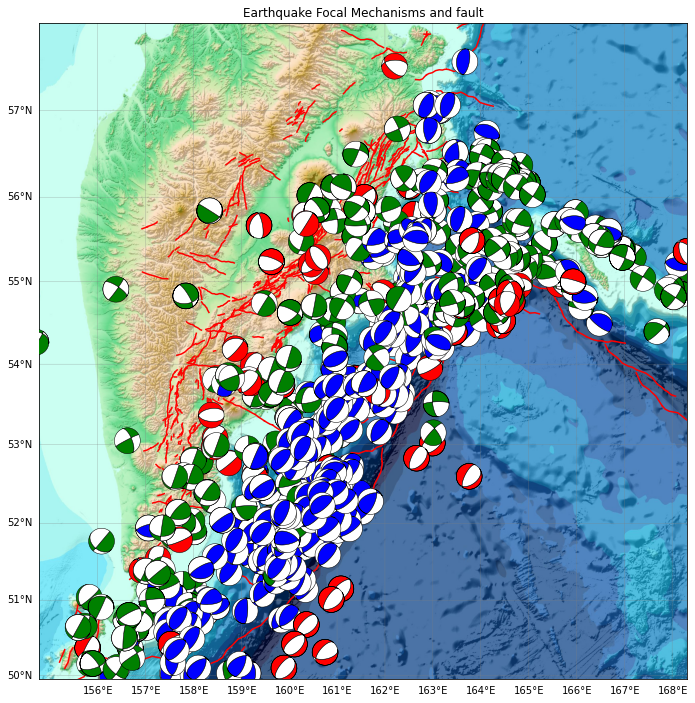

In [20]:
map = Show_map()
fault = pd.read_csv('cmtRussia.csv', sep ='\s+')

# Add beachballs for two events
ax = plt.gca()
for index, row in fault.iterrows():
    
    lons, lats, strike, dip, rake, names = row['lon'], row['lat'], row['str1'], row['dip1'], row['rake1'], row['name']
    mt = [strike, dip, rake]
    scale = row['sc']
    if 45 < rake < 135:
        color = 'blue' # strike-slip fault
    elif -135 < rake < -45:
        color = 'red' # Normal fault
    else:
        color = 'green' #reverse fault
    if not np.isnan(mt).any():
    
                x, y = map(lons, lats)
                beachball = beach(mt, xy=(x, y), width=60000, linewidth=0.5,edgecolor='k',facecolor=color)
                beachball.set_zorder(10)
                ax.add_collection(beachball)
 
    ############################--------X----------#################################

# Lire le premier fichier Shapefile des failles
shapefile_path1 = 'faille.shp'
gdf1 = gpd.read_file(shapefile_path1)
sf1= shapefile.Reader(shapefile_path1)

for shape in sf1.shapes():
            lons, lats = zip(*shape.points)
            x, y = map(lons, lats)
            plt.plot(x, y, 'r-', linewidth=1.5)

plt.title('Earthquake Focal Mechanisms and fault')
plt.show()

Dans la partie supérieure de l'arc de Kamchatka, les failles de type "strike-slip" (décrochement) et "reverse" (compressif) sont dominantes par rapport aux failles de type "normal" (étirement) dans la composante verticale. Les conséquences de cette dominance de failles de type "strike-slip" et "reverse" par rapport aux failles de type "normal" peuvent être les suivantes :

Tension latérale et compression : Les failles de type "strike-slip" indiquent généralement une tension latérale le long des failles, ce qui signifie que les blocs de terrain glissent horizontalement les uns par rapport aux autres. Les failles de type "reverse," en revanche, indiquent une compression, où les blocs de terrain se déplacent l'un vers l'autre verticalement. La combinaison de ces mécanismes suggère une combinaison de tension latérale et de compression dans la région.

Accumulation de stress : Lorsque des failles de type "strike-slip" et "reverse" sont dominantes, cela peut entraîner l'accumulation de stress le long de ces failles. L'accumulation de stress peut éventuellement déclencher des tremblements de terre lorsque la contrainte accumulée dépasse la résistance des roches le long des failles.

Complexité des mouvements tectoniques : La dominance de ces types de failles peut indiquer une complexité dans les mouvements tectoniques de la région. Par exemple, la région de Kamchatka peut être soumise à des forces tectoniques variées, ce qui entraîne une combinaison de déplacements horizontaux et verticaux.

Potentiel sismique : Les failles de type "strike-slip" et "reverse" sont souvent associées à des tremblements de terre de grande magnitude. Par conséquent, la dominance de ces types de failles dans la région de Kamchatka peut suggérer un potentiel sismique significatif dans cette zone.

En résumé, la dominance des failles de type "strike-slip" et "reverse" par rapport aux failles de type "normal" dans la partie supérieure de l'arc de Kamchatka indique une complexité dans les mouvements tectoniques de la région et suggère un potentiel sismique élevé. Cela peut avoir des implications importantes pour la gestion des risques sismiques et la sécurité dans la région de Kamchatka.

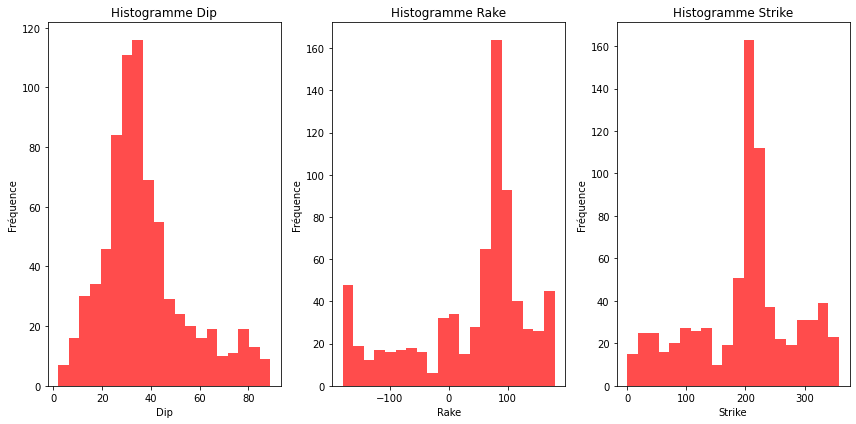

In [21]:
# Charger les données depuis le fichier CSV
data = pd.read_csv('cmtRussia.csv', sep ='\s+')

# Créer une figure Matplotlib avec trois sous-graphiques pour chaque paramètre
plt.figure(figsize=(12, 6))

# Histogramme pour Dip
plt.subplot(131)
plt.hist(data['dip1'], bins=20, color='red', alpha=0.7)
plt.xlabel('Dip')
plt.ylabel('Fréquence')
plt.title('Histogramme Dip')

# Histogramme pour Rake
plt.subplot(132)
plt.hist(data['rake1'], bins=20, color='red', alpha=0.7)
plt.xlabel('Rake')
plt.ylabel('Fréquence')
plt.title('Histogramme Rake')

# Histogramme pour Strike
plt.subplot(133)
plt.hist(data['str1'], bins=20, color='red', alpha=0.7)
plt.xlabel('Strike')
plt.ylabel('Fréquence')
plt.title('Histogramme Strike')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
# Afficher les histogrammes
plt.show()

#### WEBOGRAPHIES

[1] : www.wikipedia.org/
[2] : 

#### BIBLIOGRAPHIES

[2] : Slab shape in subduction zones beneath the Kurile–Kamchatka and Aleutian arcs based on regional tomography results
I.Yu. Koulakov, N.L. Dobretsov , N.A. Bushenkova, A.V. Yakovlev, 2010.

[3]: SEISMIC CHARACTERIZATION OF NORTHEAST ASIA, K. Mackey, L. Steck, K. Fujita, H. Hartse, and R. Stead.

[4]: Detailed mapping of seismic anisotropy with local shear waves in southeastern Kamchatka V. Levin,1 D. Droznin,2 J. Park3 and E. Gordeev2
[5]: The results of analysis and interpretation of geodetic data
[6] : The paired earthquakes within the Kamchatka Peninsula subduction zone Article in Tectonophysics · April 1998